# IST 718 | Final Project | Playground | Group/Team 2

### Project Overview:
- Classifying radiology images: Normal vs Pneumonia
- [Click here to find the dataset on Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia)

The code utilizes a pre-trained computer vision model called 'ResNet18' on radiology image data.  The model is then fine tuned on the data.  The deep learning model is tuned with three (3) epochs with a theoretical error rate of 1.1% and is exported to a `.pkl` file for future use.

### Configuring Google Drive, Kaggle
- Create free Kaggle API key
  - Needed to download the dataset from Kaggle
- Upload kaggle.json to Google Drive
  - Kaggle configuration settings
- Mount Google Drive to Colab
  - Data source copy directory
- Ensure Colab has GPU settings turned on for training

In [1]:
!python -V

Python 3.9.16


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%pwd

'/content'

In [4]:
!mkdir -p
%cd '/content/drive/MyDrive/IST 718/Final Project'

mkdir: missing operand
Try 'mkdir --help' for more information.
/content/drive/MyDrive/IST 718/Final Project


In [5]:
%ls -a

chest-xray-pneumonia/     Final_Project_Playground.ipynb
chest-xray-pneumonia.zip  kaggle.json


In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/IST 718/Final Project'

In [31]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:31<00:00, 104MB/s] 
100% 2.29G/2.29G [00:31<00:00, 78.4MB/s]


In [32]:
!unzip '/content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia.zip' -d '/content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/drive/MyDrive/IST 718/Final Project/chest-xray

### Review Data Samples

Examples of 3 'normal' cases:

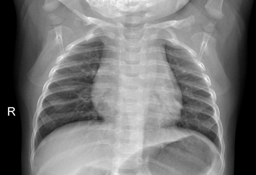

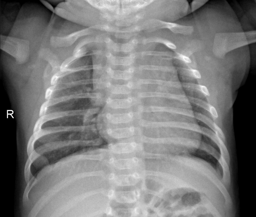

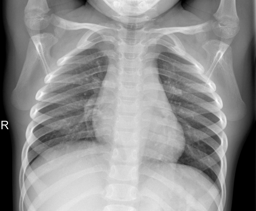

In [8]:
import os
import random
from PIL import Image

# Set the seed for the random number generator
random.seed(69)

# Set the path of the directory containing the images
dir_path = '/content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia/chest_xray/train/NORMAL/'

# Get a list of all the image files in the directory
files = [f for f in os.listdir(dir_path) if f.endswith('.jpeg')]

# Choose 3 random files from the list
random_files = random.sample(files, 3)

# Loop through each file and print it to the screen as a thumbnail
for file in random_files:
    im = Image.open(os.path.join(dir_path, file))
    im.thumbnail((256, 256))
    im.show()

Examples of 3 'abnormal' cases:

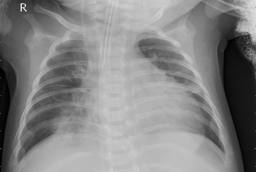

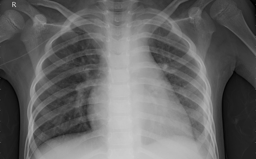

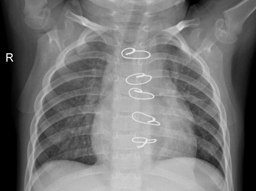

In [13]:
# Set the seed for the random number generator
random.seed(69)

# Set the path of the directory containing the images
dir_path = '/content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia/chest_xray/train/PNEUMONIA'

# Get a list of all the image files in the directory
files = [f for f in os.listdir(dir_path) if f.endswith('.jpeg')]

# Choose 3 random files from the list
random_files = random.sample(files, 3)

# Loop through each file and print it to the screen as a thumbnail
for file in random_files:
    im = Image.open(os.path.join(dir_path, file))
    im.thumbnail((256, 256))
    im.show()

### Exploring
- Ideas:
  - See how many images were in the dataset
  - See how big the files are (histogram of image sizes?)

### Train fastai Model
- Tip
  - Make sure you have your Colab GPU settings turned on...or training will take....wait for it.....forever :-)

In [15]:
from fastai.vision.all import *

In [18]:
path = Path('/content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia/chest_xray/train')
path

Path('/content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia/chest_xray/train')

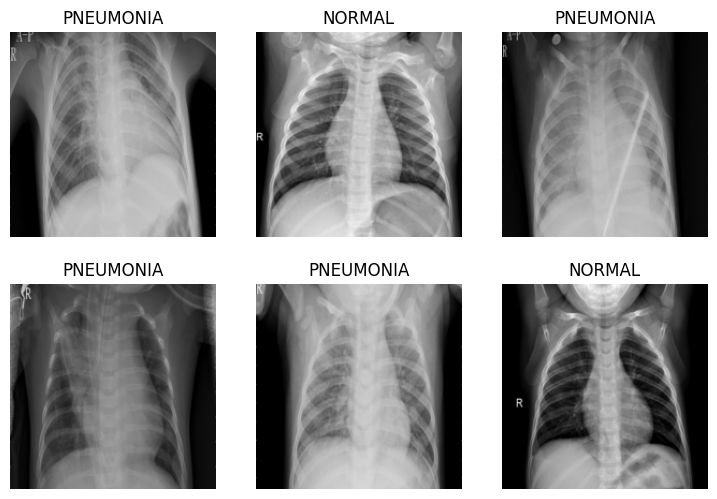

In [22]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=1),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [23]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 165MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.421595,0.138715,0.051557,02:13


epoch,train_loss,valid_loss,error_rate,time
0,0.144851,0.106104,0.026853,02:05
1,0.087914,0.045733,0.016112,02:04
2,0.038532,0.039775,0.011815,02:07


In [26]:
import os

# Save the model for future use
learn.export(f"{os.environ['KAGGLE_CONFIG_DIR']}/IST_718_Group-2_Radiology_Model_Classifier.pkl'")

In [27]:
# Load the model
learn = load_learner(f"{os.environ['KAGGLE_CONFIG_DIR']}/IST_718_Group-2_Radiology_Model_Classifier.pkl'")
learn

### Test Prediction on Sample Image

In [24]:
is_normal,_,probs = learn.predict(PILImage.create('/content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0001-0001.jpeg'))
print(f"This is a: {is_normal}.")
print(f"Probability of normal chest x-ray without findings: {probs[0]:.4f}")

This is a: NORMAL.
Probability of the patient not having pneumonia: 0.9152


# Overview of Model Architecture | Diagram

In [32]:
!pip install -Uqq graphviz

import graphviz
def gv(s): 
  return graphviz.Source('digraph G{ rankdir="LR"' + s + '; }')

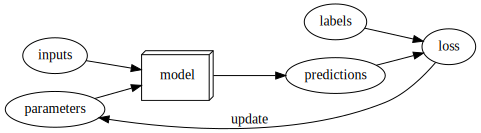

In [35]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=model]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

### Predict on Test Data

In [43]:
test_path = Path('/content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia/chest_xray/test')
test_files = get_image_files(test_path)
test_dl = dls.test_dl(test_files)
preds = learn.get_preds(dl=test_dl)

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f17754faee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f17754faee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

In [44]:
pred_labels = preds[0].argmax(dim=1)
pred_labels

tensor([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [46]:
pred_class_names = [dls.vocab[label] for label in pred_labels]
pred_class_names

['PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'NORMAL',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'NORMAL',
 'PNEUMONIA',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'NORMAL',
 'PNEUMONIA',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'PNEUMONIA',
 'NORMAL',
 'PNEUMONIA',
 'NORMAL',
 'NORMAL',
 'PNEUMONIA',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'PNEUMONIA',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'PNEUMONIA',
 'NORMAL',
 'NORMAL',
 'PNEUMONIA',
 'NORMAL',
 'PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'PNEUMONIA',
 'NORMAL',
 'PNEUMONIA',
 'NORMAL',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'NORMAL',
 'PNEUMONIA',
 'NORMAL',
 'PNEUMONIA',
 'PNEUMONIA',
 'PN

In [47]:
true_labels = [parent_label(img) for img in test_files]
correct_predictions = sum([true == pred for true, pred in zip(true_labels, pred_class_names)])
accuracy = correct_predictions / len(test_files) * 100


In [48]:
for img_file, pred_class in zip(test_files, pred_class_names):
    print(f"{img_file}: {pred_class}")


/content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0359-0001.jpeg: PNEUMONIA
/content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0373-0001.jpeg: PNEUMONIA
/content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0300-0001.jpeg: NORMAL
/content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0294-0001.jpeg: NORMAL
/content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0316-0001.jpeg: NORMAL
/content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0345-0001.jpeg: NORMAL
/content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0351-0001.jpeg: NORMAL
/content/drive/MyDrive/IST 718/Final Project/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0361-0001.jpeg: PNEUMONIA
/conten

In [49]:
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 83.33%
